TIF images → `Extract-Channels` → `Visualize-Inputs` → `Predict-Segments` → `Visualize-Segmentation` → predicted segmentations

# Configuration

In [1]:
# Parameters (overridden by notebook parameters)
input_path = './saves/input_channels.npz'
output_path = './saves'

In [2]:
# Imports

from deepcell.utils.plot_utils import create_rgb_image
import numpy as np
from PIL import Image


# Load & combine nuclear & membrane input arrays

In [3]:
with np.load(input_path) as loader:
    # An array of shape [num_inputs, height, width] containing intensity of nuclear channel
    inputs_nuclear = loader['nuclear']

    # An array of shape [num_inputs, height, width] containing intensity of membrane channel
    inputs_membrane = loader['membrane']

# An array of shape [num_inputs, height, width, 2] containing nuclear & membrane channels
input_channels = np.stack((inputs_nuclear, inputs_membrane), axis=-1)

# Create input RGB visualizations

In [4]:
nuclear_color = 'green'
membrane_color = 'blue'

# Create rgb overlay of image data for visualization
# Note that this normalizes the values from "whatever" to rgb range 0..1
input_rgbs = create_rgb_image(input_channels, channel_colors=[nuclear_color, membrane_color])

# Save all inputs

In [5]:
np.savez_compressed(output_path + '/visualized_inputs.npz', rgb=input_rgbs)

In [6]:
# The rgb values are 0..1, so normalize to 0..255
for index, rgb in enumerate(input_rgbs * 255):
    im = Image.fromarray(rgb.astype(np.uint8))
    im.save(output_path + f'/input_{index}.png', mode='RGB')

# Visualize one of the inputs.

You can delete this step if you like.

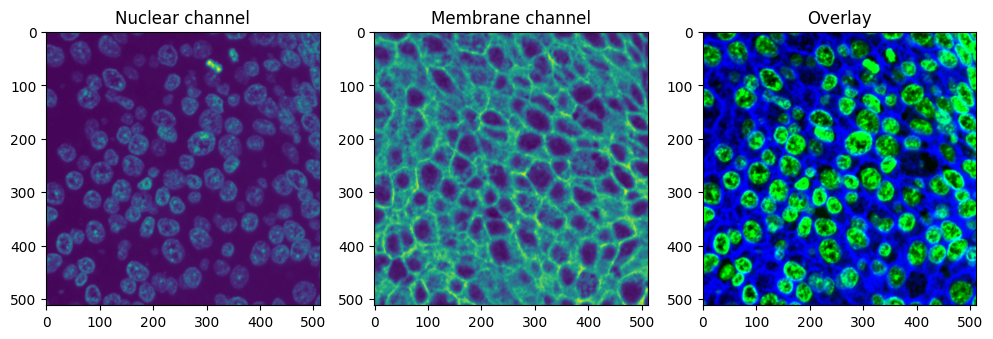

In [7]:
from matplotlib import pyplot as plt
import random
# Visualize an entry chosen arbitrarily
idx = random.randint(0, len(input_rgbs) - 1)

fig, ax = plt.subplots(1, 3, figsize=(12, 12))
ax[0].imshow(inputs_nuclear[idx, ...])
ax[1].imshow(inputs_membrane[idx, ...])
ax[2].imshow(input_rgbs[idx, ...])

ax[0].set_title('Nuclear channel')
ax[1].set_title('Membrane channel')
ax[2].set_title('Overlay')

plt.show()